<a href="https://colab.research.google.com/github/Parabucolica/ProgramacaoEstatistica/blob/main/labs/Prog_Estat_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
def bernoulli(p):
  return 1 if np.random.uniform() <=p else 0

def exponencial(lmda=1):
  u = np.random.uniform()
  return float(-np.log(u)/lmda)
c = np.sqrt((2*np.e)/np.pi)

def h_normal():
  u= np.random.uniform()
  y = exponencial(1)
  while u > (2/np.sqrt(2*np.pi))*np.e**((-y**2)/2)/ c*np.e**y:
    y = exponencial(1)
    u = np.random.uniform()
  return y

def normal_padrao():
  return h_normal() if bernoulli(1/2) else -h_normal()

def normal(mu=0, sig2=1):
  return normal_padrao()*np.sqrt(sig2) + mu


# Exercício 1

Considere $p(x) \propto e^{-x^2/2}$, isto é, $X \sim \mathcal{N}(0,1)$, e  
$$h(x) = \mathbf{1}\{x > 10\}.$$
Nosso objetivo é estimar  
$$I = \Pr(X > 10)$$

- Estime $I$ por **Monte Carlo direto**, amostrando $n = 10^5$ valores de $X \sim \mathcal{N}(0,1)$.  
- Estime novamente via **importance sampling**, usando como proposta $q(x) = \mathcal{N}(10, 1)$.  
- Compare as duas estimativas e as variâncias correspondentes.  


In [ ]:
def media_MC(func, *densidades, range_=10000):
  amostra = [func(*densidades) for _ in range(range_)]
  return amostra, float(sum(amostra)) / range_


metodo_direto = media_MC(lambda x: 1 if x() > 10 else 0, normal)

# densidade torcida: é uma normal(10,1)
# queremos calcular E[I(X>10)*f(x)/g(x)] logo nosso estimador seria 1/n Soma(I(X>10)* normal(0,1) / normal(10,1)

# essa funcao representa f/g (x) * I(X>10), em que X ~ Normal(10,1)
def funcao(a):
  x = a(10,1)
  return np.exp(-x**2+10*x-50) if x>10 else 0

metodo_importancia = media_MC(funcao, normal)

print("Estimativa de I por Monte Carlo Direto:" , metodo_direto[1],
      f", com variância {np.var(metodo_direto[0])}")

print("Estimativa de I usando Amostragem por Importância:" , metodo_importancia[1],
      f", com variância estimada {np.var(metodo_importancia[0])}")


Estimativa de I por Monte Carlo Direto: 0.0 , com variância 0.0
Estimativa de I usando Amostragem por Importância: 7.585354519054426e-24 , com variância estimada 6.9834780364571166e-46


# Exercício 2

Considere $X \sim \mathcal{N}(0,1)$ e a função

$$
g(x) = 10 \exp\!\left(-5(x - 5)^4\right).
$$

Nosso objetivo é aproximar a integral

$$
I = \mathbb{E}[g(X)] = \int g(x) f_X(x)\,dx,
$$

onde $f_X$ é a densidade da normal padrão.

Note que $g(x)$ é relevante apenas em uma região distante da média da normal, o que torna o método de Monte Carlo ingênuo ineficiente.

Para melhorar a eficiência, vamos usar **amostragem por importância**, escolhendo uma densidade inclinada (*tilted normal*) centrada próxima da região onde $g(x)$ é significativo.

1. Plote a função $g(x)$ e identifique aproximadamente onde ela assume valores mais relevantes.

2. Plote no mesmo gráfico:
   - a densidade da normal padrão $\mathcal{N}(0,1)$;
   - uma densidade inclinada $\mathcal{N}(\mu_t, 1)$, com $\mu_t$ escolhido a partir da região identificada no item (1).

3. Plote os pesos de correção $f(x)/g_t(x)$ e também o termo $g(x)\,f(x)/g_t(x)$, onde $g_t$ é a densidade inclinada usada no *importance sampling*.

4. Implemente a aproximação de $I$:
   - usando **Monte Carlo ingênuo**;
   - usando **amostragem por importância** com a tilted normal.

5. Compare as estimativas e discuta a redução de variância obtida.


estimativa usando MC diretamente:  1.7059099990070987e-08
estimativa usando Amostragem por Importância: 0.004099116717603438
redução de variância: de 2.9096131499134303e-12 para 3.689013138786249e-05


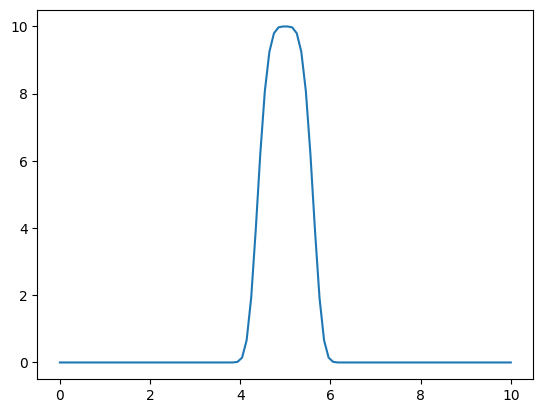

In [ ]:
def normal_density(x, mu):
  return 1/(np.sqrt(np.pi*2)) * np.exp(-(1/2)*((x-mu)**2))

def g_(x):
  return 10*np.exp(-5*((x-5)**4))

mc_direto = media_MC(g, normal)
print("estimativa usando MC diretamente: ", mc_direto[1])

# com isso notamos que os dados se concentram ao redor de cinco e usaremos,
# portanto, uma normal(5,1)
x = np.linspace(0,10,100)
sns.lineplot(x=x, y=g_(x))

def est(a):
  b = a(5,1)
  return g_(b) * normal_density(b,1) / normal_density(b,5)

mc_importancia = media_MC(est, normal)
print("estimativa usando Amostragem por Importância:", mc_importancia[1])

#algo não parece certo aqui
print(f"redução de variância: de {np.var(mc_direto[0])} para {np.var(mc_importancia[0])}")